In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [13]:
data= pd.read_csv('consumer_psych_recommendation.csv')

C:\Users\Bogda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
for ii in data.columns:
    print(ii)

consumer_id
consumer_dob
mhtp
consumer_gender
why_looking
prev_psych_experiences
diagnosis
proxy_id
proxy_first_name
proxy_last_name
psych_id
description
psych_gender
fees
headline
callout1
callout2
callout3
sliding_scale
is_visible
bulk_billing
rebate
likes_to_do
psych_dob
first_session
ndis
online_sessions
practising_since
therapeutic_approach
avg_rating
rating_valid_for_display
recommendation_id
preview_display_count
preview_rank_avg
self_shortlisted
staff_shortlisted
self_matched
staff_matched
self_unmatched
staff_unmatched
psych_unmatched
viewed
sent_message
booked_appt
sessions
rating_avg


In [15]:
def n_nan(df,column):
    
    # Count nans and find percentage
    
    percentage = 1-df[column].value_counts().sum()/len(df)
    
    print(column, " = ",np.round(percentage*100,1))
    
data_name = data.columns
print('length data = ', len(data),'\n')
for names in data_name:
    n_nan(data,names)

length data =  231589 

consumer_id  =  0.0
consumer_dob  =  26.6
mhtp  =  0.0
consumer_gender  =  2.0
why_looking  =  13.8
prev_psych_experiences  =  97.1
diagnosis  =  96.5
proxy_id  =  2.1
proxy_first_name  =  98.2
proxy_last_name  =  99.4
psych_id  =  0.0
description  =  4.9
psych_gender  =  5.5
fees  =  15.9
headline  =  38.4
callout1  =  41.3
callout2  =  42.3
callout3  =  44.2
sliding_scale  =  21.7
is_visible  =  0.0
bulk_billing  =  19.9
rebate  =  16.1
likes_to_do  =  50.9
psych_dob  =  64.8
first_session  =  82.2
ndis  =  83.8
online_sessions  =  71.9
practising_since  =  70.5
therapeutic_approach  =  78.6
avg_rating  =  60.2
rating_valid_for_display  =  60.2
recommendation_id  =  0.0
preview_display_count  =  0.0
preview_rank_avg  =  0.0
self_shortlisted  =  0.0
staff_shortlisted  =  0.0
self_matched  =  0.0
staff_matched  =  0.0
self_unmatched  =  98.3
staff_unmatched  =  98.3
psych_unmatched  =  98.3
viewed  =  0.0
sent_message  =  93.3
booked_appt  =  0.0
sessions  =  93

In [16]:
# #     consumer_age = []
# for dobs in consumer.dob:
#     if type(dobs) is str:
#         consumer_age.append(2018-int(dobs[:4]))
#     else:
#         consumer_age.append(np.nan)

# Convert all dates to ages
def date_to_years(dates):
    
    now=datetime.datetime.now()
    
    years = []
    
    for date in dates:
        if type(date) is str:
            years.append(now.year - int(date[:4]))
        else:
            years.append(np.nan)
            
    return(years)

In [17]:
# Change years practicing, and dobs to ages and years

data['consumer_age'] = date_to_years(data.consumer_dob)
data['psych_age'] = date_to_years(data.psych_dob)
data['years_practicing'] = date_to_years(data.practising_since)

In [18]:
# Drop all last values

drop_columns = ['rating_avg', 
                'sessions',
                'booked_appt', 
                'sent_message', 
                'viewed', 
                'psych_unmatched',
                'staff_unmatched',
                'self_unmatched',
                'staff_matched',
                'self_matched',
                'staff_shortlisted',
                'recommendation_id',
                'proxy_first_name',
                'proxy_last_name',
                'diagnosis',
                'first_session',
                'ndis',
                'why_looking',
                'description',
                'headline',
                'likes_to_do',
                'therapeutic_approach',
                'callout1',
                'callout2',
                'callout3',
                'prev_psych_experiences',
                'consumer_dob',
                'practising_since',
                'psych_dob',
                'avg_rating',
                'rating_valid_for_display'
               ]

In [19]:
data=data.drop(drop_columns,1)

In [20]:
data

,consumer_id,mhtp,consumer_gender,proxy_id,psych_id,psych_gender,fees,sliding_scale,is_visible,bulk_billing,rebate,online_sessions,preview_display_count,preview_rank_avg,self_shortlisted,consumer_age,psych_age,years_practicing
0,90851028,True,M,1.0,8831884,M,160.0,False,False,False,84.8,NaN,17,23.647059,False,36.0,NaN,NaN
1,90851028,True,M,1.0,8653175,F,199.0,False,False,False,84.8,NaN,14,35.000000,False,36.0,NaN,NaN
2,95763509,True,F,1.0,8653175,F,199.0,False,False,False,84.8,NaN,3,35.333333,False,38.0,NaN,NaN
3,90851028,True,M,1.0,8447728,M,NaN,NaN,True,NaN,NaN,NaN,17,18.176471,False,36.0,NaN,NaN
4,95763509,True,F,1.0,8453466,F,195.0,True,False,True,124.5,NaN,3,26.333333,False,38.0,50.0,21.0
5,95763509,True,F,1.0,8443112,F,140.0,True,False,False,84.8,True,4,21.250000,False,38.0,NaN,NaN
6,90851028,True,M,1.0,8402310,NaN,165.0,False,False,False,84.8,NaN,14,29.000000,False,36.0,NaN,NaN
7,90851028,True,M,1.0,8510281,F,124.8,True,False,False,84.8,NaN,14,34.000000,False,36.0,29.0,2.0
8,90851028,True,M,1.0,8274369,F,140.0,True,True,True,84.8,NaN,17,5.352941,False,36.0,38.0,10.0
9,93556988,False,F,1.0,8274369,F,140.0,True,True,True,84.8,NaN,5,3.800000,False,19.0,38.0,10.0


# Convert all bools and males and females

In [21]:
# Map bool values to 0, 1 ,2 (true, false, unknown)

gender_to_binary = {"M":int(0), "F":int(1)}
bool_to_binary = {True:1, False:0}

# Boool list

bool_list = ['mhtp',
             'sliding_scale',
             'is_visible',
             'bulk_billing',
             'online_sessions',
             'self_shortlisted']

gender_list = ['consumer_gender', 'psych_gender']

In [22]:
for bools in bool_list:
    data[bools] = data[bools].map(bool_to_binary).values

In [23]:
data['consumer_gender'] = data['consumer_gender'].map(gender_to_binary).values
data['psych_gender'] = data['psych_gender'].map(gender_to_binary).values

In [24]:
data

,consumer_id,mhtp,consumer_gender,proxy_id,psych_id,psych_gender,fees,sliding_scale,is_visible,bulk_billing,rebate,online_sessions,preview_display_count,preview_rank_avg,self_shortlisted,consumer_age,psych_age,years_practicing
0,90851028,1,0.0,1.0,8831884,0.0,160.0,0.0,0,0.0,84.8,NaN,17,23.647059,0,36.0,NaN,NaN
1,90851028,1,0.0,1.0,8653175,1.0,199.0,0.0,0,0.0,84.8,NaN,14,35.000000,0,36.0,NaN,NaN
2,95763509,1,1.0,1.0,8653175,1.0,199.0,0.0,0,0.0,84.8,NaN,3,35.333333,0,38.0,NaN,NaN
3,90851028,1,0.0,1.0,8447728,0.0,NaN,NaN,1,NaN,NaN,NaN,17,18.176471,0,36.0,NaN,NaN
4,95763509,1,1.0,1.0,8453466,1.0,195.0,1.0,0,1.0,124.5,NaN,3,26.333333,0,38.0,50.0,21.0
5,95763509,1,1.0,1.0,8443112,1.0,140.0,1.0,0,0.0,84.8,1.0,4,21.250000,0,38.0,NaN,NaN
6,90851028,1,0.0,1.0,8402310,NaN,165.0,0.0,0,0.0,84.8,NaN,14,29.000000,0,36.0,NaN,NaN
7,90851028,1,0.0,1.0,8510281,1.0,124.8,1.0,0,0.0,84.8,NaN,14,34.000000,0,36.0,29.0,2.0
8,90851028,1,0.0,1.0,8274369,1.0,140.0,1.0,1,1.0,84.8,NaN,17,5.352941,0,36.0,38.0,10.0
9,93556988,0,1.0,1.0,8274369,1.0,140.0,1.0,1,1.0,84.8,NaN,5,3.800000,0,19.0,38.0,10.0


In [25]:
data_name = data.columns
print('length data = ', len(data),'\n')
for names in data_name:
    n_nan(data,names)

length data =  231589 

consumer_id  =  0.0
mhtp  =  0.0
consumer_gender  =  2.7
proxy_id  =  2.1
psych_id  =  0.0
psych_gender  =  5.5
fees  =  15.9
sliding_scale  =  21.7
is_visible  =  0.0
bulk_billing  =  19.9
rebate  =  16.1
online_sessions  =  71.9
preview_display_count  =  0.0
preview_rank_avg  =  0.0
self_shortlisted  =  0.0
consumer_age  =  26.6
psych_age  =  64.8
years_practicing  =  70.5


# Now we need to replace all data such as costs, age to mean. Have a look at the data first

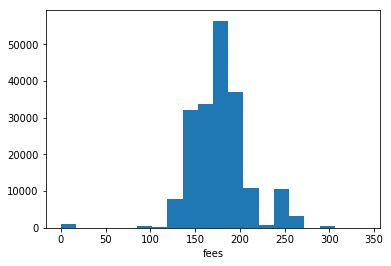

In [26]:
# fees are 84% data so we should keep. look at distribution

plt.hist(data.fees.dropna(),bins=20)
plt.xlabel('fees')
plt.show()

In [27]:
data['fees'] = data.fees.fillna(data.fees.mean())

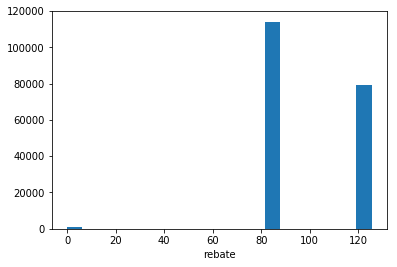

In [28]:
# Now look at rebate So the rebate

plt.hist(data.rebate.dropna(), bins=20)
plt.xlabel('rebate')
plt.show()

In [29]:
data['rebate'] = data.rebate.fillna(data.rebate.mean())

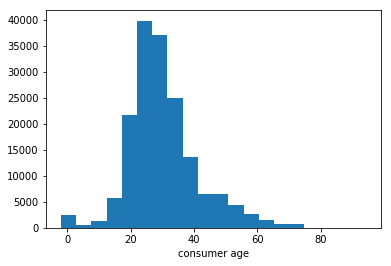

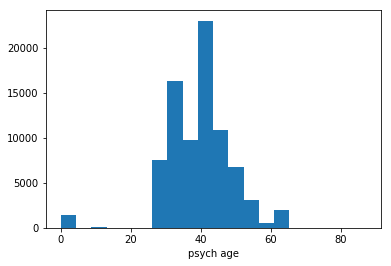

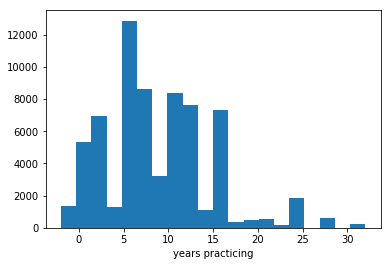

In [30]:
# Lets look at the ages
# We have a lot data for consumer age ~ 75% and ~35% for psych age

# We may have to distribute ages according to some probability but we will deal with this later

plt.hist(data.consumer_age.dropna(),bins=20)
plt.xlabel('consumer age')
plt.show()

plt.hist(data.psych_age.dropna(),bins=20)
plt.xlabel('psych age')
plt.show()


plt.hist(data.years_practicing.dropna(),bins=20)
plt.xlabel('years practicing')
plt.show()


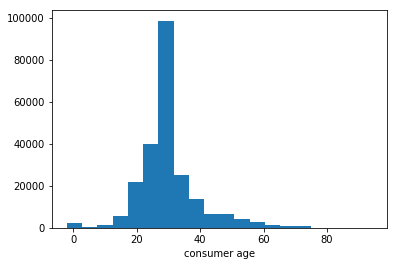

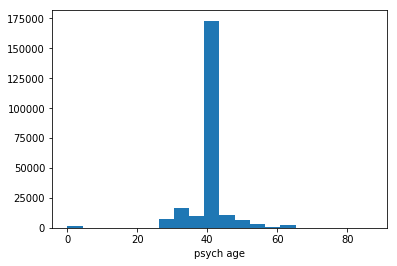

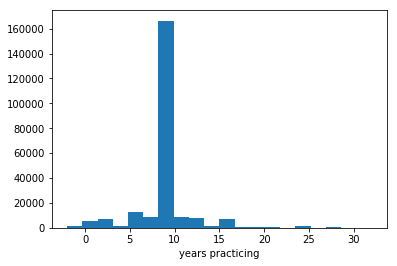

In [31]:
data['psych_age'] = data.psych_age.fillna(data.psych_age.mean())
data['consumer_age'] = data.consumer_age.fillna(data.consumer_age.mean())
data['years_practicing'] = data.years_practicing.fillna(data.years_practicing.mean())


plt.hist(data.consumer_age.dropna(),bins=20)
plt.xlabel('consumer age')
plt.show()

plt.hist(data.psych_age.dropna(),bins=20)
plt.xlabel('psych age')
plt.show()


plt.hist(data.years_practicing.dropna(),bins=20)
plt.xlabel('years practicing')
plt.show()


In [32]:
data.head()

,consumer_id,mhtp,consumer_gender,proxy_id,psych_id,psych_gender,fees,sliding_scale,is_visible,bulk_billing,rebate,online_sessions,preview_display_count,preview_rank_avg,self_shortlisted,consumer_age,psych_age,years_practicing
0,90851028,1,0.0,1.0,8831884,0.0,160.000000,0.0,0,0.0,84.80000,NaN,17,23.647059,0,36.0,39.981849,8.756485
1,90851028,1,0.0,1.0,8653175,1.0,199.000000,0.0,0,0.0,84.80000,NaN,14,35.000000,0,36.0,39.981849,8.756485
2,95763509,1,1.0,1.0,8653175,1.0,199.000000,0.0,0,0.0,84.80000,NaN,3,35.333333,0,38.0,39.981849,8.756485
3,90851028,1,0.0,1.0,8447728,0.0,176.805102,NaN,1,NaN,100.55836,NaN,17,18.176471,0,36.0,39.981849,8.756485
4,95763509,1,1.0,1.0,8453466,1.0,195.000000,1.0,0,1.0,124.50000,NaN,3,26.333333,0,38.0,50.000000,21.000000


In [33]:
data_name = data.columns
print('length data = ', len(data),'\n')
for names in data_name:
    n_nan(data,names)

length data =  231589 

consumer_id  =  0.0
mhtp  =  0.0
consumer_gender  =  2.7
proxy_id  =  2.1
psych_id  =  0.0
psych_gender  =  5.5
fees  =  0.0
sliding_scale  =  21.7
is_visible  =  0.0
bulk_billing  =  19.9
rebate  =  0.0
online_sessions  =  71.9
preview_display_count  =  0.0
preview_rank_avg  =  0.0
self_shortlisted  =  0.0
consumer_age  =  0.0
psych_age  =  0.0
years_practicing  =  0.0


# We have cleaned up the data and possibly skewed it but it may be in a potentially useable form to run through a model

In [34]:
data = data.fillna(-1)

In [35]:
# All our data should be free of Nans

data_name = data.columns
print('length data = ', len(data),'\n')
for names in data_name:
    n_nan(data,names)

length data =  231589 

consumer_id  =  0.0
mhtp  =  0.0
consumer_gender  =  0.0
proxy_id  =  0.0
psych_id  =  0.0
psych_gender  =  0.0
fees  =  0.0
sliding_scale  =  0.0
is_visible  =  0.0
bulk_billing  =  0.0
rebate  =  0.0
online_sessions  =  0.0
preview_display_count  =  0.0
preview_rank_avg  =  0.0
self_shortlisted  =  0.0
consumer_age  =  0.0
psych_age  =  0.0
years_practicing  =  0.0


In [36]:
data.head()

,consumer_id,mhtp,consumer_gender,proxy_id,psych_id,psych_gender,fees,sliding_scale,is_visible,bulk_billing,rebate,online_sessions,preview_display_count,preview_rank_avg,self_shortlisted,consumer_age,psych_age,years_practicing
0,90851028,1,0.0,1.0,8831884,0.0,160.000000,0.0,0,0.0,84.80000,-1.0,17,23.647059,0,36.0,39.981849,8.756485
1,90851028,1,0.0,1.0,8653175,1.0,199.000000,0.0,0,0.0,84.80000,-1.0,14,35.000000,0,36.0,39.981849,8.756485
2,95763509,1,1.0,1.0,8653175,1.0,199.000000,0.0,0,0.0,84.80000,-1.0,3,35.333333,0,38.0,39.981849,8.756485
3,90851028,1,0.0,1.0,8447728,0.0,176.805102,-1.0,1,-1.0,100.55836,-1.0,17,18.176471,0,36.0,39.981849,8.756485
4,95763509,1,1.0,1.0,8453466,1.0,195.000000,1.0,0,1.0,124.50000,-1.0,3,26.333333,0,38.0,50.000000,21.000000


We will drop id's because they are irrelavent. We want to find if these configurations of features will successfully predict whether they are self_shortlisted based of particular features.

In [37]:
# data = data.drop(['consumer_id', 'psych_id'],1)

In [38]:
data.head()

,consumer_id,mhtp,consumer_gender,proxy_id,psych_id,psych_gender,fees,sliding_scale,is_visible,bulk_billing,rebate,online_sessions,preview_display_count,preview_rank_avg,self_shortlisted,consumer_age,psych_age,years_practicing
0,90851028,1,0.0,1.0,8831884,0.0,160.000000,0.0,0,0.0,84.80000,-1.0,17,23.647059,0,36.0,39.981849,8.756485
1,90851028,1,0.0,1.0,8653175,1.0,199.000000,0.0,0,0.0,84.80000,-1.0,14,35.000000,0,36.0,39.981849,8.756485
2,95763509,1,1.0,1.0,8653175,1.0,199.000000,0.0,0,0.0,84.80000,-1.0,3,35.333333,0,38.0,39.981849,8.756485
3,90851028,1,0.0,1.0,8447728,0.0,176.805102,-1.0,1,-1.0,100.55836,-1.0,17,18.176471,0,36.0,39.981849,8.756485
4,95763509,1,1.0,1.0,8453466,1.0,195.000000,1.0,0,1.0,124.50000,-1.0,3,26.333333,0,38.0,50.000000,21.000000


In [39]:
data.to_csv("prepared.csv")

In [40]:
data.loc[data['consumer_id']==data['consumer_id'][0]]

,consumer_id,mhtp,consumer_gender,proxy_id,psych_id,psych_gender,fees,sliding_scale,is_visible,bulk_billing,rebate,online_sessions,preview_display_count,preview_rank_avg,self_shortlisted,consumer_age,psych_age,years_practicing
0,90851028,1,0.0,1.0,8831884,0.0,160.000000,0.0,0,0.0,84.80000,-1.0,17,23.647059,0,36.0,39.981849,8.756485
1,90851028,1,0.0,1.0,8653175,1.0,199.000000,0.0,0,0.0,84.80000,-1.0,14,35.000000,0,36.0,39.981849,8.756485
3,90851028,1,0.0,1.0,8447728,0.0,176.805102,-1.0,1,-1.0,100.55836,-1.0,17,18.176471,0,36.0,39.981849,8.756485
6,90851028,1,0.0,1.0,8402310,-1.0,165.000000,0.0,0,0.0,84.80000,-1.0,14,29.000000,0,36.0,39.981849,8.756485
7,90851028,1,0.0,1.0,8510281,1.0,124.800000,1.0,0,0.0,84.80000,-1.0,14,34.000000,0,36.0,29.000000,2.000000
8,90851028,1,0.0,1.0,8274369,1.0,140.000000,1.0,1,1.0,84.80000,-1.0,17,5.352941,0,36.0,38.000000,10.000000
12,90851028,1,0.0,1.0,8485574,0.0,176.805102,-1.0,1,-1.0,100.55836,-1.0,14,37.000000,0,36.0,39.981849,8.756485
14,90851028,1,0.0,1.0,8491708,1.0,160.000000,0.0,1,0.0,84.80000,-1.0,15,26.800000,0,36.0,45.000000,14.000000
16,90851028,1,0.0,1.0,8988493,1.0,155.000000,0.0,1,0.0,84.80000,1.0,17,4.352941,0,36.0,39.981849,8.756485
17,90851028,1,0.0,1.0,8461744,0.0,176.805102,-1.0,1,-1.0,100.55836,-1.0,14,43.000000,0,36.0,39.981849,8.756485


In [41]:
data['consumer_id'][0]

90851028

# Pre-processing answer data

In [67]:
import pandas as pd
import numpy as np

In [68]:
answerData = pd.read_csv('answer.csv')

In [70]:
answerData

,answer_id,consumer_id,question_id,slug,text,answer,answer_text
0,462,92798598,1,ready,Are you ready to see a psychologist in the nex...,1,Yes
1,463,92798598,2,male,Would you prefer to see a male psychologist?,2,Doesn't matter
2,464,92798598,3,female,Would you prefer to see a female psychologist?,2,Doesn't matter
3,465,92798598,4,sameage,Would you prefer to see a psychologist around ...,2,Doesn't matter
4,466,92798598,5,mhtp,Do you have a GP mental health treatment plan?,2,No
5,467,92798598,11,fees50,Can you afford $50 per session above the Medic...,1,Yes
6,468,92798598,8,pubtrans,Do you need to use public transport to get to ...,1,Yes
7,469,92798598,7,before,Have you seen a psychologist before?,1,Yes
8,470,92798598,12,fees100,Can you afford $100 per session above the Medi...,2,No
9,471,92798598,6,workhrs,Can you see a psychologist during working hours?,1,Yes


In [69]:
Adata = pd.pivot_table(answerData, index = 'consumer_id', columns = 'slug', values = 'answer_text')

DataError: No numeric types to aggregate

In [47]:
Adata['consumer_id'] = Adata.index

In [48]:
ind = range(len(Adata))
Adata.index = ind

In [49]:
Adata

slug,afford,appt_rating,before,besthelp,coach,empathy,extras,fees100,fees50,female,friend,male,mhtp,psygen,pubtrans,ready,sameage,telehealth,workhrs,consumer_id
0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,1.0,NaN,1.0,NaN,90012806
1,3.0,NaN,1.0,1.0,1.0,NaN,120.0,NaN,NaN,NaN,1.0,NaN,2.0,3.0,2.0,1.0,2.0,1.0,2.0,90013170
2,1.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,1.0,NaN,NaN,NaN,90014859
3,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,1.0,90020205
4,2.0,NaN,1.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,2.0,1.0,2.0,NaN,1.0,90027217
5,2.0,NaN,1.0,3.0,1.0,NaN,72.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,2.0,1.0,2.0,NaN,1.0,90028750
6,3.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,1.0,2.0,NaN,NaN,90032784
7,4.0,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,1.0,2.0,1.0,2.0,NaN,2.0,90034077
8,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,NaN,NaN,90035365
9,3.0,NaN,2.0,3.0,1.0,NaN,6.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0,2.0,2.0,1.0,1.0,90036311


In [54]:
new_data_set = pd.merge(data, Adata, on='consumer_id', how= 'left')
    

In [55]:
new_data_set.shape

(231589, 37)

,consumer_id,mhtp_x,consumer_gender,proxy_id,psych_id,psych_gender,fees,sliding_scale,is_visible,bulk_billing,...,female,friend,male,mhtp_y,psygen,pubtrans,ready,sameage,telehealth,workhrs
0,90851028,1,0.0,1.0,8831884,0.0,160.000000,0.0,0,0.0,...,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,NaN,NaN
1,90851028,1,0.0,1.0,8653175,1.0,199.000000,0.0,0,0.0,...,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,NaN,NaN
2,95763509,1,1.0,1.0,8653175,1.0,199.000000,0.0,0,0.0,...,NaN,1.0,NaN,1.0,3.0,2.0,1.0,NaN,NaN,NaN
3,90851028,1,0.0,1.0,8447728,0.0,176.805102,-1.0,1,-1.0,...,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,NaN,NaN
4,95763509,1,1.0,1.0,8453466,1.0,195.000000,1.0,0,1.0,...,NaN,1.0,NaN,1.0,3.0,2.0,1.0,NaN,NaN,NaN


In [64]:
# All our data should be free of Nans

data_name = new_data_set.columns
print('length data = ', len(new_data_set),'\n')
for names in data_name:
    n_nan(new_data_set,names)

length data =  231589 

consumer_id  =  0.0
mhtp_x  =  0.0
consumer_gender  =  0.0
proxy_id  =  0.0
psych_id  =  0.0
psych_gender  =  0.0
fees  =  0.0
sliding_scale  =  0.0
is_visible  =  0.0
bulk_billing  =  0.0
rebate  =  0.0
online_sessions  =  0.0
preview_display_count  =  0.0
preview_rank_avg  =  0.0
self_shortlisted  =  0.0
consumer_age  =  0.0
psych_age  =  0.0
years_practicing  =  0.0
afford  =  13.0
appt_rating  =  97.0
before  =  53.4
besthelp  =  33.0
coach  =  56.1
empathy  =  99.7
extras  =  64.7
fees100  =  99.9
fees50  =  99.9
female  =  99.9
friend  =  55.7
male  =  99.9
mhtp_y  =  11.1
psygen  =  9.7
pubtrans  =  30.2
ready  =  10.5
sameage  =  54.3
telehealth  =  65.4
workhrs  =  51.9


In [65]:
new_data_set.self_shortlisted

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
231559    0
231560    0
231561    0
231562    0
231563    0
231564    0
231565    0
231566    0
231567    0
231568    0
231569    0
231570    1
231571    0
231572    0
231573    0
231574    0
231575    0
231576    1
231577    0
231578    0
231579    0
231580    0
231581    0
231582    0
231583    0
231584    0
231585    0
231586    0
231587    0
231588    0
Name: self_shortlisted, Length: 231589, dtype: int64

In [73]:
new_data_set.fillna(-1)

,consumer_id,mhtp_x,consumer_gender,proxy_id,psych_id,psych_gender,fees,sliding_scale,is_visible,bulk_billing,...,female,friend,male,mhtp_y,psygen,pubtrans,ready,sameage,telehealth,workhrs
0,90851028,1,0.0,1.0,8831884,0.0,160.000000,0.0,0,0.0,...,-1.0,-1.0,-1.0,1.0,1.0,2.0,1.0,-1.0,-1.0,-1.0
1,90851028,1,0.0,1.0,8653175,1.0,199.000000,0.0,0,0.0,...,-1.0,-1.0,-1.0,1.0,1.0,2.0,1.0,-1.0,-1.0,-1.0
2,95763509,1,1.0,1.0,8653175,1.0,199.000000,0.0,0,0.0,...,-1.0,1.0,-1.0,1.0,3.0,2.0,1.0,-1.0,-1.0,-1.0
3,90851028,1,0.0,1.0,8447728,0.0,176.805102,-1.0,1,-1.0,...,-1.0,-1.0,-1.0,1.0,1.0,2.0,1.0,-1.0,-1.0,-1.0
4,95763509,1,1.0,1.0,8453466,1.0,195.000000,1.0,0,1.0,...,-1.0,1.0,-1.0,1.0,3.0,2.0,1.0,-1.0,-1.0,-1.0
5,95763509,1,1.0,1.0,8443112,1.0,140.000000,1.0,0,0.0,...,-1.0,1.0,-1.0,1.0,3.0,2.0,1.0,-1.0,-1.0,-1.0
6,90851028,1,0.0,1.0,8402310,-1.0,165.000000,0.0,0,0.0,...,-1.0,-1.0,-1.0,1.0,1.0,2.0,1.0,-1.0,-1.0,-1.0
7,90851028,1,0.0,1.0,8510281,1.0,124.800000,1.0,0,0.0,...,-1.0,-1.0,-1.0,1.0,1.0,2.0,1.0,-1.0,-1.0,-1.0
8,90851028,1,0.0,1.0,8274369,1.0,140.000000,1.0,1,1.0,...,-1.0,-1.0,-1.0,1.0,1.0,2.0,1.0,-1.0,-1.0,-1.0
9,93556988,0,1.0,1.0,8274369,1.0,140.000000,1.0,1,1.0,...,-1.0,-1.0,-1.0,2.0,3.0,1.0,1.0,-1.0,-1.0,-1.0


In [75]:
new_data_set.to_csv('model_data.csv')